In [1]:
import mne
import os
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from scipy.io import wavfile
from scipy.signal import find_peaks

import warnings
warnings.filterwarnings("ignore")

In [6]:
file = '/var/data/apnea/edf/00000995-100507%5B001%5D.edf'
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
info = data.info
channels = data.ch_names

Extracting EDF parameters from /var/data/apnea/edf/00000995-100507%5B001%5D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [7]:
info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG A1-A2, EEG C3-A2, EEG C4-A1, EOG LOC-A2, EOG ROC-A2, EMG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 93.0 Hz
 meas_date: 2019-04-17 22:35:00 UTC
 nchan: 20
 projs: []
 sfreq: 48000.0 Hz
>

In [8]:
channels

['EEG A1-A2',
 'EEG C3-A2',
 'EEG C4-A1',
 'EOG LOC-A2',
 'EOG ROC-A2',
 'EMG Chin',
 'Leg 1',
 'Leg 2',
 'ECG I',
 'RR',
 'Snore',
 'Flow Patient-0',
 'Flow Patient-1',
 'Effort THO',
 'Effort ABD',
 'SpO2',
 'Body',
 'PulseRate',
 'Mic',
 'Tracheal']

In [9]:
channel_id = 'Tracheal'
selected_channel = data.copy().pick_channels([channel_id])

In [5]:
for i in range(1,6):
    file = f'/var/data/apnea/edf/00000999-100507%5B00{i}%5D.edf'
    data = mne.io.read_raw_edf(file)
    raw_data = data.get_data()
    info = data.info
    channels = data.ch_names

    channel_id = 'Tracheal'
    selected_channel = data.copy().pick_channels([channel_id])
    selected_data = selected_channel.get_data()[0]

    print(len(selected_data))


Extracting EDF parameters from /var/data/apnea/edf/00000999-100507%5B001%5D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
59904000
Extracting EDF parameters from /var/data/apnea/edf/00000999-100507%5B002%5D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
1440000
Extracting EDF parameters from /var/data/apnea/edf/00000999-100507%5B003%5D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
1680000
Extracting EDF parameters from /var/data/apnea/edf/00000999-100507%5B004%5D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
1248000
Extracting EDF parameters from /var/data/apnea/edf/00000999-100507%5B005%5D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
5424000


In [10]:
selected_data = selected_channel.get_data()[0]

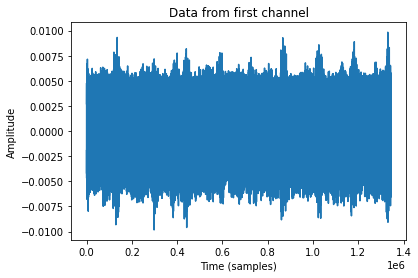

In [11]:
plt.plot(selected_data)
plt.title("Data from first channel")
plt.xlabel("Time (samples)")
plt.ylabel("Amplitude")
plt.show()

In [7]:
channel_data = selected_data

max_value = np.max(np.abs(channel_data))
scaled_data = channel_data / max_value

output_file = "./output_audio.wav"
sf.write(output_file, scaled_data, int(info['sfreq']))  # info['sfreq'] - частота дискретизации

print(f"Аудио сохранено в файл: {output_file}")

Аудио сохранено в файл: ./output_audio.wav


In [ ]:
from IPython.display import Audio

Audio(selected_data, rate = 48000)


: 

In [208]:
# file_path = '/var/data/apnea/output_audio.wav'
# fs, signal = wavfile.read(file_path)
signal = selected_data

if signal.dtype == np.int16:
    signal = signal / 32768.0

peaks, properties = find_peaks(signal, height=0.08, distance=fs//2)
peak_times = peaks / fs
peak_times2 = np.array([(i, t) for i, t in enumerate(peak_times)])

differences = np.diff(peak_times)
id_to_delete = np.where(differences < 5)[0]+1
peak_times2 = np.delete(peak_times2, id_to_delete, axis=0)

time = np.arange(len(signal)) / fs


In [209]:
plt.figure(figsize=(16, 12))
plt.plot(time, signal, label="Аудиосигнал")
plt.plot(time[peaks], signal[peaks], "x", label="Пики", color="red")

for i, peak in enumerate(peaks):
    for j in range(len(peak_times2)):
        if peak_times2[j][0] == i:
            plt.axvline(x=time[peak], color='green', linestyle='--')
            plt.text(time[peak], -0.1, f'{peak_times2[j][1]:.1f} с', color='blue', 
                    verticalalignment='top', horizontalalignment='center')

plt.title("Детектирование пиков в аудиосигнале")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.legend()
plt.grid(True)


plt.show()

KeyboardInterrupt: 